# Imports

In [60]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('dataset.csv', delimiter=';')
df.head()

,Transaction ID,Date,Time,Card Type,Entry Mode,Amount,Transaction Type,Merchant Group,Transaction Country,Shipping Address,Billing Address,Gender,Age,Issuing Bank,Fraudulent
0,1,19/10/2023,05:31,MasterCard,Tap,391.56,POS,Clothing,Italy,61 Redwood St,726 Maple St,Female,55,XYZ Bank,No
1,2,16/10/2023,12:56,MasterCard,Tap,167.67,Online,Clothing,France,945 Pine St,252 Cedar St,Male,37,DEF Bank,No
2,3,29/09/2023,07:57,MasterCard,PIN,126.24,Online,Electronics,Spain,773 Oak St,177 Main St,Male,53,ABC Bank,No
3,4,13/10/2023,00:08,MasterCard,Tap,496.80,Online,Electronics,UK,436 Maple St,758 Main St,Male,21,DEF Bank,No
4,5,02/10/2023,23:19,MasterCard,Tap,446.88,POS,Grocery,France,887 Pine St,629 Main St,Male,52,XYZ Bank,No


# Análise Exploratória de Dados

In [62]:
df.isna().sum()

Transaction ID         0
Date                   0
Time                   0
Card Type              0
Entry Mode             0
Amount                 0
Transaction Type       0
Merchant Group         0
Transaction Country    0
Shipping Address       0
Billing Address        0
Gender                 0
Age                    0
Issuing Bank           0
Fraudulent             0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.shape

(1000, 15)

In [65]:
df['Card Type'].unique()

array(['MasterCard', 'Visa'], dtype=object)

In [66]:
df['Entry Mode'].unique()

array(['Tap', 'PIN'], dtype=object)

In [67]:
df['Merchant Group'].unique()

array(['Clothing', 'Electronics', 'Grocery', 'Food', 'ATM Withdrawal',
       'Retail'], dtype=object)

In [68]:
df['Transaction Country'].unique()

array(['Italy', 'France', 'Spain', 'UK', 'USA', 'Germany', 'Canada'],
      dtype=object)

In [69]:
df['Issuing Bank'].unique()

array(['XYZ Bank', 'DEF Bank', 'ABC Bank'], dtype=object)

In [70]:
df_fraudulent = df.query('Fraudulent == "Yes"')
df_fraudulent['Fraudulent'].unique()

array(['Yes'], dtype=object)

In [71]:
df_not_fraudulent = df[df['Fraudulent'] == 'No']
df_not_fraudulent['Fraudulent'].unique()

array(['No'], dtype=object)

# Age

In [72]:
df['Age'].describe()

count    1000.000000
mean       44.657000
std        15.177606
min        18.000000
25%        31.000000
50%        45.500000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age'>

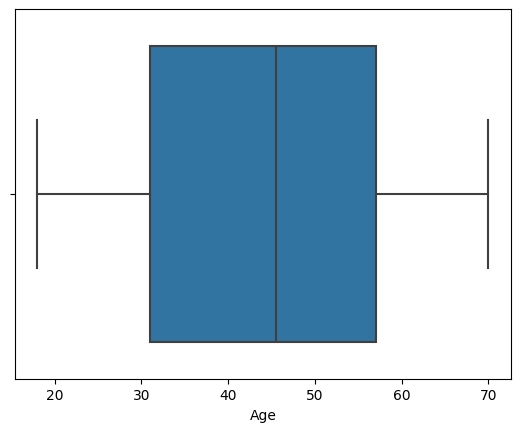

In [73]:
sns.boxplot(df, x=df['Age'])

## Age X Fraudulent

In [74]:
def print_histplot(fraudulent, not_fraudulent, column):
    print('Fraudulent')
    sns.histplot(fraudulent, x=fraudulent[column])
    plt.show()

    print('Not Fraudulent')
    sns.histplot(not_fraudulent, x=not_fraudulent[column])
    plt.show()

def hist_fraudulent(column):
    print_histplot(df_fraudulent, df_not_fraudulent, column)

    

Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


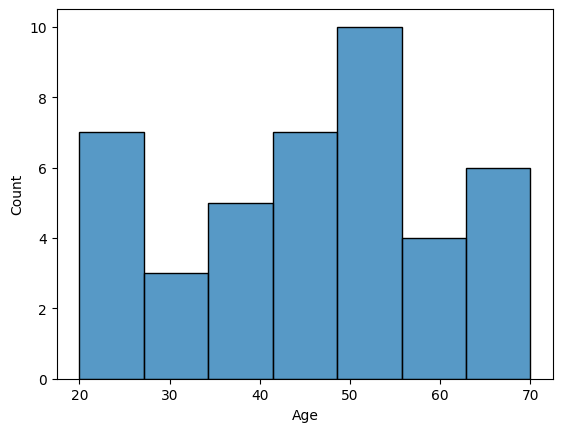

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Not Fraudulent


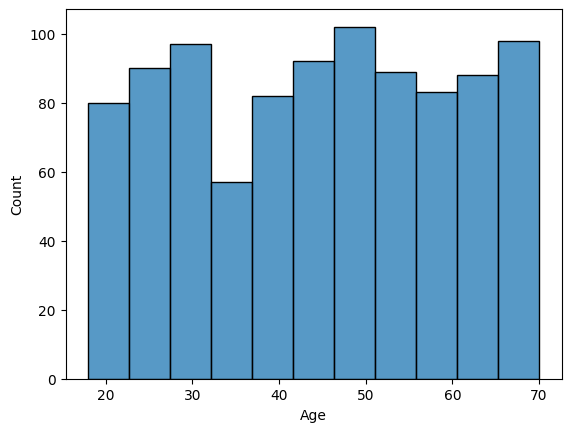

In [75]:
hist_fraudulent('Age')

# Amount

In [76]:
df['Amount'].describe()

count    1000.000000
mean      266.140270
std       138.775169
min        20.180000
25%       147.895000
50%       268.365000
75%       380.532500
max       499.690000
Name: Amount, dtype: float64

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Amount'>

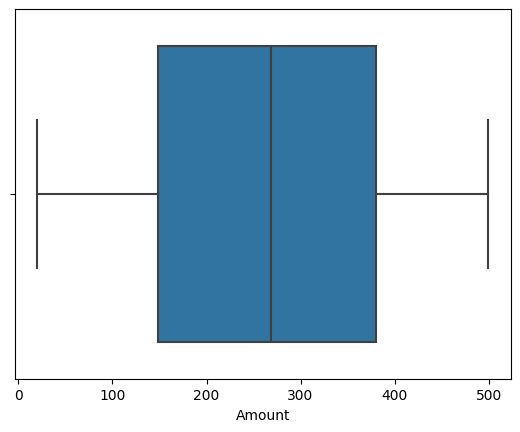

In [77]:
sns.boxplot(df, x=df['Amount'])

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Count'>

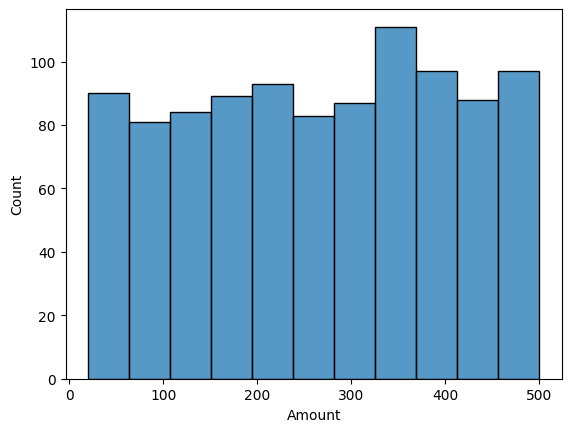

In [78]:
sns.histplot(df, x=df['Amount'])

In [79]:
df.query('Amount > 400 ').count()

Transaction ID         207
Date                   207
Time                   207
Card Type              207
Entry Mode             207
Amount                 207
Transaction Type       207
Merchant Group         207
Transaction Country    207
Shipping Address       207
Billing Address        207
Gender                 207
Age                    207
Issuing Bank           207
Fraudulent             207
dtype: int64

# Fraudulent

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fraudulent', ylabel='count'>

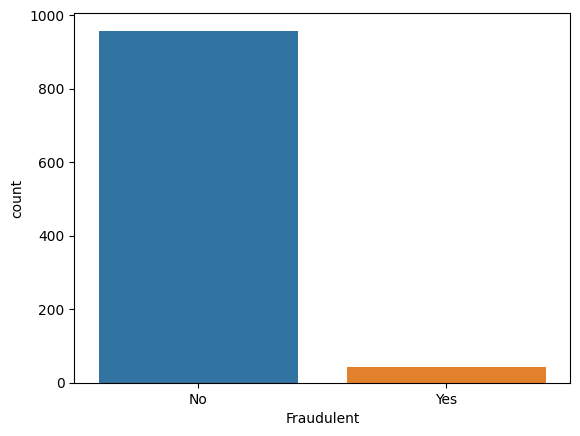

In [80]:
sns.countplot(df, x=df['Fraudulent'])

In [81]:
df['Fraudulent'].value_counts()

Fraudulent
No     958
Yes     42
Name: count, dtype: int64

# Card Type

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Card Type', ylabel='count'>

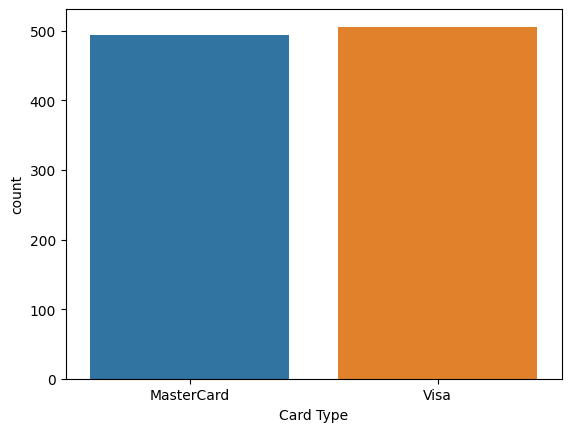

In [82]:
sns.countplot(df, x=df['Card Type'])

# Sex

In [83]:
df['Gender'].value_counts(normalize=True)*100

Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64

## Gender X Fraudulent

/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Fraudulent


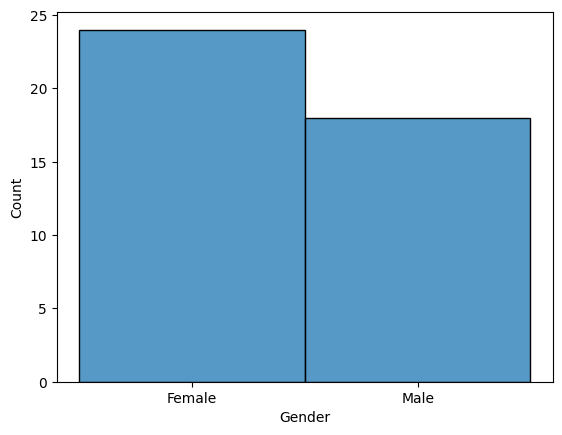

Not Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


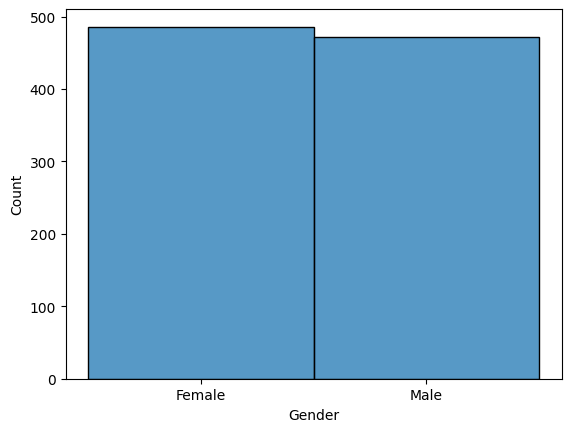

In [84]:
hist_fraudulent('Gender')

# Transaction Type	

Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


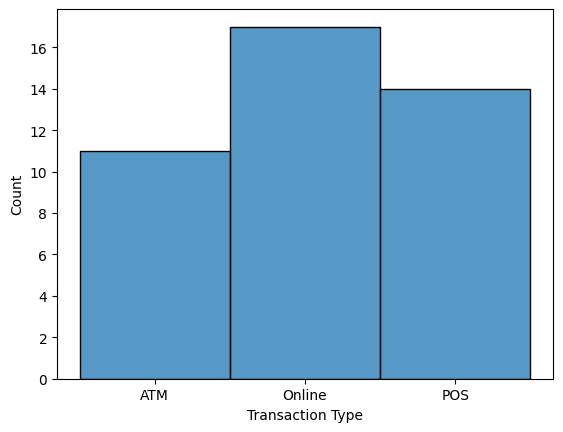

Not Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


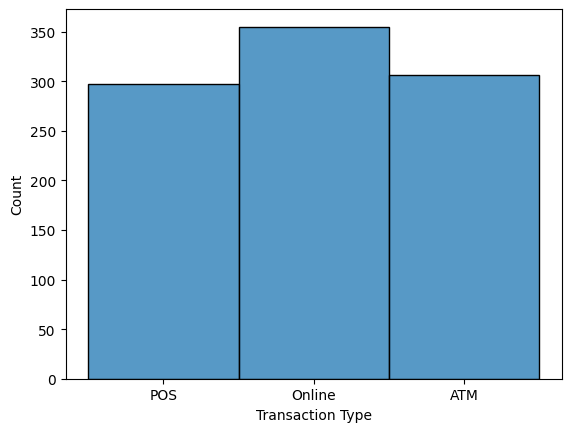

In [85]:
hist_fraudulent('Transaction Type')

# Merchant Group

Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


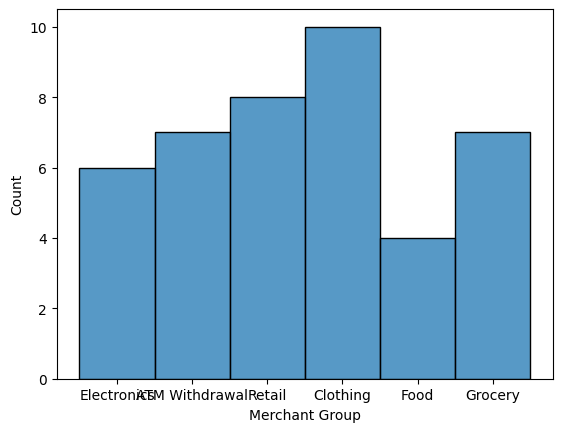

Not Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


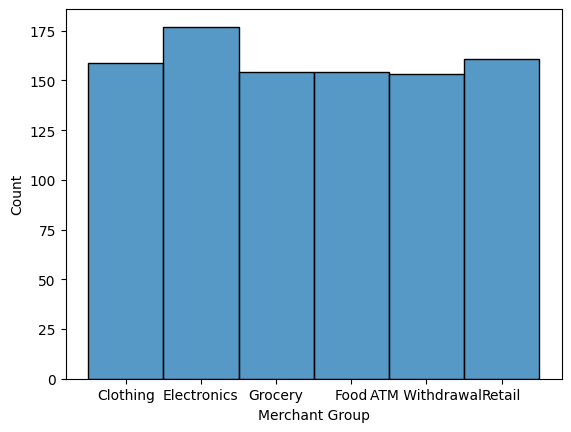

In [86]:
hist_fraudulent('Merchant Group')
# sns.countplot(df_fraudulent, x=df_fraudulent['Merchant Group'])

# Transaction Country


Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


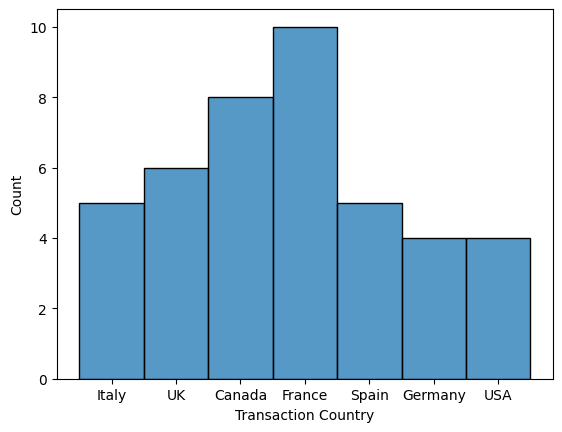

Not Fraudulent


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


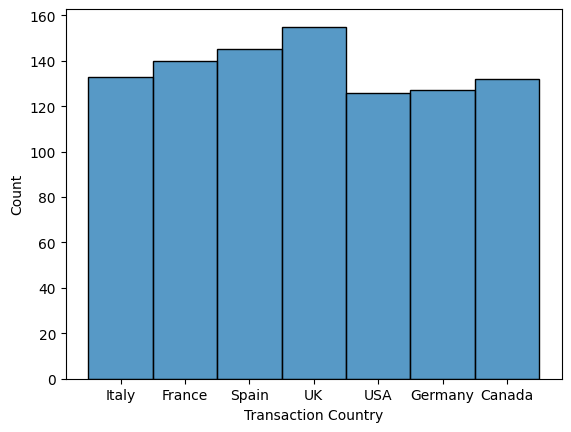

In [87]:
hist_fraudulent('Transaction Country')

# Date

In [88]:
df.head()

,Transaction ID,Date,Time,Card Type,Entry Mode,Amount,Transaction Type,Merchant Group,Transaction Country,Shipping Address,Billing Address,Gender,Age,Issuing Bank,Fraudulent
0,1,19/10/2023,05:31,MasterCard,Tap,391.56,POS,Clothing,Italy,61 Redwood St,726 Maple St,Female,55,XYZ Bank,No
1,2,16/10/2023,12:56,MasterCard,Tap,167.67,Online,Clothing,France,945 Pine St,252 Cedar St,Male,37,DEF Bank,No
2,3,29/09/2023,07:57,MasterCard,PIN,126.24,Online,Electronics,Spain,773 Oak St,177 Main St,Male,53,ABC Bank,No
3,4,13/10/2023,00:08,MasterCard,Tap,496.80,Online,Electronics,UK,436 Maple St,758 Main St,Male,21,DEF Bank,No
4,5,02/10/2023,23:19,MasterCard,Tap,446.88,POS,Grocery,France,887 Pine St,629 Main St,Male,52,XYZ Bank,No


In [89]:
df['Date'].unique()

array(['19/10/2023', '16/10/2023', '29/09/2023', '13/10/2023',
       '02/10/2023', '03/10/2023', '28/09/2023', '18/09/2023',
       '07/10/2023', '10/10/2023', '23/09/2023', '30/09/2023',
       '25/09/2023', '20/10/2023', '11/10/2023', '04/10/2023',
       '12/10/2023', '01/10/2023', '18/10/2023', '08/10/2023',
       '15/10/2023', '21/10/2023', '14/10/2023', '27/09/2023',
       '06/10/2023', '26/09/2023', '22/10/2023', '17/09/2023',
       '09/10/2023', '05/10/2023', '21/09/2023', '24/09/2023',
       '19/09/2023', '17/10/2023', '20/09/2023', '22/09/2023'],
      dtype=object)

In [90]:
df_fraudulent['Date'] = pd.to_datetime(df_fraudulent['Date'], format="%d/%m/%Y")

/tmp/ipykernel_43004/2325432596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['Date'] = pd.to_datetime(df_fraudulent['Date'], format="%d/%m/%Y")


In [91]:
df_fraudulent[df_fraudulent['Date'].dt.month == 10].count()

Transaction ID         28
Date                   28
Time                   28
Card Type              28
Entry Mode             28
Amount                 28
Transaction Type       28
Merchant Group         28
Transaction Country    28
Shipping Address       28
Billing Address        28
Gender                 28
Age                    28
Issuing Bank           28
Fraudulent             28
dtype: int64

In [92]:
df_fraudulent[df_fraudulent['Date'].dt.month == 9].count()

Transaction ID         14
Date                   14
Time                   14
Card Type              14
Entry Mode             14
Amount                 14
Transaction Type       14
Merchant Group         14
Transaction Country    14
Shipping Address       14
Billing Address        14
Gender                 14
Age                    14
Issuing Bank           14
Fraudulent             14
dtype: int64

In [93]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [94]:
df_fraudulent['day_of_week'] = df['Date'].dt.day_of_week

/tmp/ipykernel_43004/2622803596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['day_of_week'] = df['Date'].dt.day_of_week


In [95]:
day_names = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df_fraudulent['days_name'] = df_fraudulent['day_of_week'].map(day_names)

/tmp/ipykernel_43004/3232240021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['days_name'] = df_fraudulent['day_of_week'].map(day_names)


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='days_name', ylabel='count'>

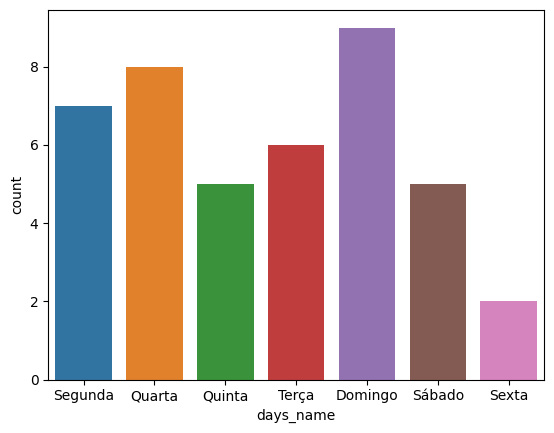

In [96]:
sns.countplot(df_fraudulent, x=df_fraudulent['days_name'])

# Time

In [97]:
df['Time'] = df['Time'].apply(lambda x: x[0:2])


/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gseganzerla/.cache/pypoetry/virtualenvs/data-science-3_EHRu8F-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Count'>

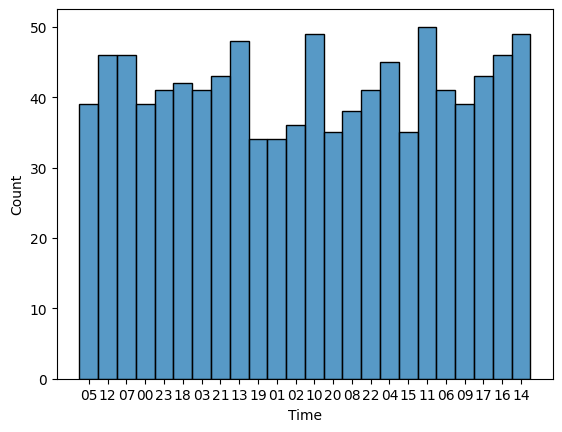

In [98]:
sns.histplot(df, x=df['Time'])

# Summary

In [99]:
df.describe()

,Transaction ID,Date,Amount,Age
count,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,2023-10-04 11:55:40.800000,266.140270,44.657000
min,1.000000,2023-09-17 00:00:00,20.180000,18.000000
25%,250.750000,2023-09-25 00:00:00,147.895000,31.000000
50%,500.500000,2023-10-04 00:00:00,268.365000,45.500000
75%,750.250000,2023-10-13 00:00:00,380.532500,57.000000
max,1000.000000,2023-10-22 00:00:00,499.690000,70.000000
std,288.819436,NaN,138.775169,15.177606


# 2 Pre-Processing

In [100]:
df.drop(['Transaction ID', 'Shipping Address', 'Billing Address'], axis='columns', inplace=True)

In [101]:
df.head()

,Date,Time,Card Type,Entry Mode,Amount,Transaction Type,Merchant Group,Transaction Country,Gender,Age,Issuing Bank,Fraudulent
0,2023-10-19,05,MasterCard,Tap,391.56,POS,Clothing,Italy,Female,55,XYZ Bank,No
1,2023-10-16,12,MasterCard,Tap,167.67,Online,Clothing,France,Male,37,DEF Bank,No
2,2023-09-29,07,MasterCard,PIN,126.24,Online,Electronics,Spain,Male,53,ABC Bank,No
3,2023-10-13,00,MasterCard,Tap,496.80,Online,Electronics,UK,Male,21,DEF Bank,No
4,2023-10-02,23,MasterCard,Tap,446.88,POS,Grocery,France,Male,52,XYZ Bank,No


In [102]:
X_fraudulent = df.iloc[:, 1:11]
X_fraudulent

,Time,Card Type,Entry Mode,Amount,Transaction Type,Merchant Group,Transaction Country,Gender,Age,Issuing Bank
0,05,MasterCard,Tap,391.56,POS,Clothing,Italy,Female,55,XYZ Bank
1,12,MasterCard,Tap,167.67,Online,Clothing,France,Male,37,DEF Bank
2,07,MasterCard,PIN,126.24,Online,Electronics,Spain,Male,53,ABC Bank
3,00,MasterCard,Tap,496.80,Online,Electronics,UK,Male,21,DEF Bank
4,23,MasterCard,Tap,446.88,POS,Grocery,France,Male,52,XYZ Bank
...,...,...,...,...,...,...,...,...,...,...
995,10,Visa,PIN,105.81,Online,Clothing,Canada,Female,46,XYZ Bank
996,12,MasterCard,PIN,360.21,Online,Food,Germany,Female,61,DEF Bank
997,02,Visa,PIN,260.24,ATM,Clothing,France,Male,38,DEF Bank
998,13,Visa,Tap,416.61,POS,ATM Withdrawal,France,Male,39,ABC Bank


In [103]:
y_fraudulent = df.iloc[:, 11]
y_fraudulent

0      No
1      No
2      No
3      No
4      No
       ..
995    No
996    No
997    No
998    No
999    No
Name: Fraudulent, Length: 1000, dtype: object

In [104]:
df.columns

Index(['Date', 'Time', 'Card Type', 'Entry Mode', 'Amount', 'Transaction Type',
       'Merchant Group', 'Transaction Country', 'Gender', 'Age',
       'Issuing Bank', 'Fraudulent'],
      dtype='object')

In [105]:
features_to_transform = [1, 2, 4, 5, 6, 7, 9]
features_to_transform = ['Card Type', 'Entry Mode', 'Transaction Type',
       'Merchant Group', 'Transaction Country', 'Gender',
       'Issuing Bank', 'Date', 'Time']

In [106]:
# X_fraudulent[0]

In [107]:
# X_fraudulent[0][9]

In [108]:
# columns_transformer = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), features_to_transform)], remainder='passthrough')
# X_fraudulent = columns_transformer.fit_transform(X_fraudulent)


# X_fraudulent

dummies = pd.get_dummies(df, columns=features_to_transform, dtype=int)
dummies.head()


,Amount,Age,Fraudulent,Card Type_MasterCard,Card Type_Visa,Entry Mode_PIN,Entry Mode_Tap,Transaction Type_ATM,Transaction Type_Online,Transaction Type_POS,...,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23
0,391.56,55,No,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,167.67,37,No,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,126.24,53,No,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,496.80,21,No,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,446.88,52,No,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [109]:

discretas = dummies.iloc[:, 0:2]
discretas

,Amount,Age
0,391.56,55
1,167.67,37
2,126.24,53
3,496.80,21
4,446.88,52
...,...,...
995,105.81,46
996,360.21,61
997,260.24,38
998,416.61,39


In [110]:
scaler = StandardScaler()

discretas_padronizadas = scaler.fit_transform(discretas)

discretas_padronizadas

array([[ 0.90421426,  0.68180553],
       [-0.70992198, -0.50474572],
       [-1.0086118 ,  0.5499665 ],
       ...,
       [-0.04253803, -0.4388262 ],
       [ 1.08481238, -0.37290669],
       [-1.11841257,  1.5387592 ]])

In [111]:
dummies = pd.concat([dummies, pd.DataFrame(discretas_padronizadas)], axis=1)


dummies.drop(['Amount', 'Age'], axis=1, inplace=True)

dummies.rename(columns={0: 'Amount', 1: 'Age'}, inplace=True)
dummies

,Fraudulent,Card Type_MasterCard,Card Type_Visa,Entry Mode_PIN,Entry Mode_Tap,Transaction Type_ATM,Transaction Type_Online,Transaction Type_POS,Merchant Group_ATM Withdrawal,Merchant Group_Clothing,...,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23,Amount,Age
0,No,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0.904214,0.681806
1,No,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,-0.709922,-0.504746
2,No,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-1.008612,0.549967
3,No,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.662943,-1.559458
4,No,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.303044,0.484047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,-1.155902,0.088530
996,No,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.678196,1.077323
997,No,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,-0.042538,-0.438826
998,No,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1.084812,-0.372907


In [112]:
df_fraudulent = dummies[dummies['Fraudulent'] == 'Yes']
df_not_fraudulent = dummies[dummies['Fraudulent'] == 'No']

In [113]:
fraudulent_train, fraudulent_test = train_test_split(df_fraudulent, test_size=.2, random_state=42)

In [114]:
not_fraudulent_train, not_fraudulent_test = train_test_split(df_not_fraudulent, test_size=.2, random_state=42)

In [115]:
train = pd.concat([fraudulent_train, not_fraudulent_train], axis=0)

In [116]:
test = pd.concat([fraudulent_test, not_fraudulent_test], axis=0)

In [117]:
X_train = train.drop(['Fraudulent'], axis='columns')

In [118]:
X_train

,Card Type_MasterCard,Card Type_Visa,Entry Mode_PIN,Entry Mode_Tap,Transaction Type_ATM,Transaction Type_Online,Transaction Type_POS,Merchant Group_ATM Withdrawal,Merchant Group_Clothing,Merchant Group_Electronics,...,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23,Amount,Age
230,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.477700,-1.625377
759,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1.525674,0.022610
356,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,-1.621636,1.275081
478,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1.071403,0.484047
307,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,-1.660063,-0.175148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.553476,1.604679
279,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,-0.127322,-1.493538
896,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.510678,0.681806
450,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.117039,-0.900263


In [120]:
y_train = train['Fraudulent']
y_train

230    Yes
759    Yes
356    Yes
478    Yes
307    Yes
      ... 
107     No
279     No
896     No
450     No
103     No
Name: Fraudulent, Length: 799, dtype: object

In [122]:
X_test = test.drop(['Fraudulent'], axis='columns')
X_test

,Card Type_MasterCard,Card Type_Visa,Entry Mode_PIN,Entry Mode_Tap,Transaction Type_ATM,Transaction Type_Online,Transaction Type_POS,Merchant Group_ATM Withdrawal,Merchant Group_Clothing,Merchant Group_Electronics,...,Time_16,Time_17,Time_18,Time_19,Time_20,Time_21,Time_22,Time_23,Amount,Age
702,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.867738,0.286288
367,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.105652,0.352208
243,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0.810419,1.143242
752,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,-1.765466,0.220369
137,0,1,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,-0.676181,-0.043309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.415338,0.418127
698,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,-0.950792,-0.636585
33,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0.904791,-1.691297
31,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.490609,-0.372907


In [123]:
y_test = test['Fraudulent']
y_test

702    Yes
367    Yes
243    Yes
752    Yes
137    Yes
      ... 
480     No
698     No
33      No
31      No
740     No
Name: Fraudulent, Length: 201, dtype: object